In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from skimpy import skim
from skimpy import clean_columns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



#Supress Warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [68]:
#Load Dataset
data_csv = pd.read_csv('data-for-project-1/raw_data.csv')
data_csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [69]:
#examine the data types, values that are missing and shape of the data
print(data_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [70]:
clean_columns(data_csv)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [71]:
#dimensions of the data are checked 
print(f'There are {data_csv.shape[0]} rows and {data_csv.shape[1]} columns in the data')

There are 614 rows and 13 columns in the data


In [72]:

skim(data_csv)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ ApplicantIncome        │   0 │      0 │   5400 │   6100 │  150 │   2900 │  3800 │  5800 │  81000 │    ▇    │  │
│ │ CoapplicantIncome      │   0 │      0 │   1600 │   2900 │    0 │      0 │  1200 │  2300 │  42000 │    ▇    │  │
│ │ LoanAmount             │  22 │   3.58 │    150 │     86 │    9 │    100 │   130 │   170 │    700 │   ▇▇▁   │  │
│ │ Loan_Amount_Term       │  14 │   2.28 │    340 │     65 │   12 │    360 │   360 │   360 │    480 │    ▁ ▇  │  │
│ │ Credit_History         │  50 │   8.14 │   0.84 │   0.36 │    0 │      1 │     1 │     1 │      1 │ ▁    ▇  │  │
│ └────────────────────────┴─────┴────────┴────────┴────────┴──────┴────────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Loan_ID                      │      0 │          0 │                           1 │                     614 │  │
│ │ Gender                       │     13 │       2.12 │                        0.98 │                     601 │  │
│ │ Married                      │      3 │       0.49 │                           1 │                     611 │  │
│ │ Dependents                   │     15 │       2.44 │                        0.98 │                     599 │  │
│ │ Education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ Self_Employed                │     32 │       5.21 │                        0.95 │                     582 │  │
│ │ Property_Area                │      0 │          0 │                           1 │                     614 │  │
│ │ Loan_Status                  │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [73]:
#Check for missing values
data_csv.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
data_csv['Dependents'] = data_csv['Dependents'].replace('3+',3)

#Dependents column converted to numeric values
data_csv['Dependents'] = pd.to_numeric(data_csv['Dependents'],errors='coerce')

In [75]:
#Filling in missing values in the Gender Column with the mode value
data_csv['Gender'].fillna(data_csv['Gender'].mode()[0],inplace=True)

#Filling in missing values in the Married Column with the mode value
data_csv['Married'].fillna(data_csv['Married'].mode()[0],inplace=True)

#Filling in missing values in the Dependents Column with the median value
data_csv['Dependents'].fillna(data_csv['Dependents'].median(),inplace=True)

#Filling in missing values in the Self_Employes Column with the mode value
data_csv['Self_Employed'].fillna(data_csv['Self_Employed'].mode()[0],inplace=True)

#Filling in missing values in the LoanAmount Column with the median value
data_csv['LoanAmount'].fillna(data_csv['LoanAmount'].median(),inplace=True)

#Filling in missing values in the Loan_Amount_Term Column with the median value
data_csv['Loan_Amount_Term'].fillna(data_csv['Loan_Amount_Term'].median(),inplace=True)

#Filling in missing values in the Credit_History Column with the median value
data_csv['Credit_History'].fillna(data_csv['Credit_History'].median(),inplace=True)

In [76]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [77]:
data_csv.drop_duplicates(inplace=True)

In [78]:
data_csv.describe([x*0.1 for x in range(10)])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
0%,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
10%,0.000000,2216.100000,0.000000,72.300000,300.000000,0.000000
20%,0.000000,2605.400000,0.000000,96.000000,360.000000,1.000000
30%,0.000000,3050.400000,0.000000,109.900000,360.000000,1.000000
40%,0.000000,3406.800000,0.000000,119.200000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000


In [79]:
label_encoder = LabelEncoder()
data_csv['Gender'] = label_encoder.fit_transform(data_csv['Gender'])

data_csv['Married'] = label_encoder.fit_transform(data_csv['Married'])

data_csv['Education'] = label_encoder.fit_transform(data_csv['Education'])

data_csv['Self_Employed'] = label_encoder.fit_transform(data_csv['Self_Employed'])

data_csv['Property_Area'] = label_encoder.fit_transform(data_csv['Property_Area'])

data_csv['Loan_Status'] = label_encoder.fit_transform(data_csv['Loan_Status'])

<Axes: xlabel='ApplicantIncome'>

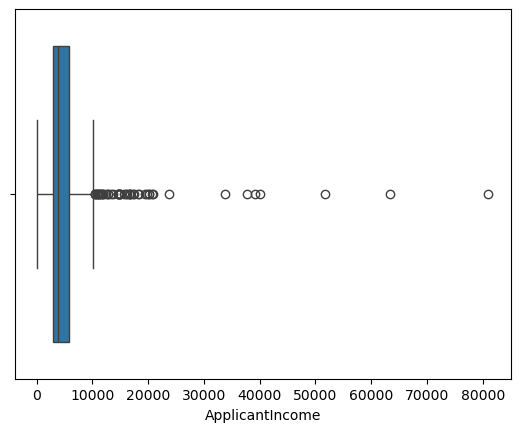

In [80]:
sns.boxplot(x=data_csv['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome'>

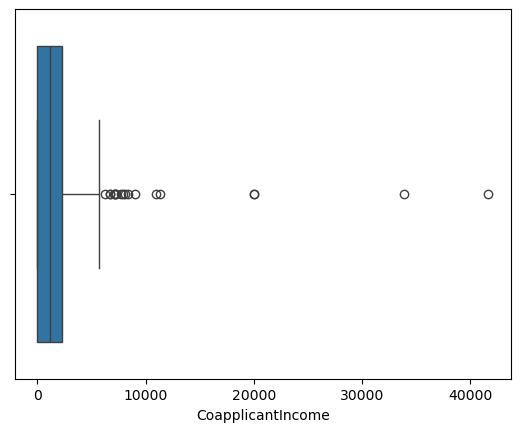

In [81]:
sns.boxplot(x=data_csv['CoapplicantIncome'])

<Axes: xlabel='LoanAmount'>

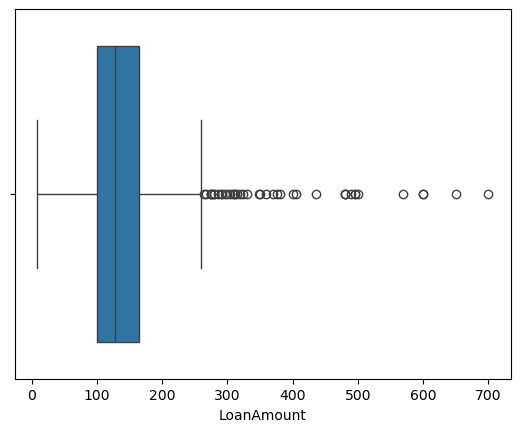

In [82]:
sns.boxplot(x=data_csv['LoanAmount'])

In [83]:
data_csv.describe([x*0.1 for x in range(10)])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,2216.100000,0.000000,72.300000,300.000000,0.000000,0.000000,0.000000
20%,1.000000,0.000000,0.000000,0.000000,0.000000,2605.400000,0.000000,96.000000,360.000000,1.000000,0.000000,0.000000
30%,1.000000,0.000000,0.000000,0.000000,0.000000,3050.400000,0.000000,109.900000,360.000000,1.000000,1.000000,0.000000
40%,1.000000,1.000000,0.000000,0.000000,0.000000,3406.800000,0.000000,119.200000,360.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000


In [84]:
import numpy as np

# Select only the numeric columns
num_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
mean = data_csv[num_columns].mean()
std_dev = data_csv[num_columns].std()

In [85]:
Q1 = data_csv[num_columns].quantile(0.25)
Q3 = data_csv[num_columns].quantile(0.75)
IQR = Q3 - Q1

data_csv_out = data_csv[~((data_csv[num_columns] < (Q1 - 1.5 * IQR)) | (data_csv[num_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [86]:
median = data_csv[num_columns].median()
data_csv[num_columns] = np.where(data_csv[num_columns] < (Q1 - 1.5 * IQR), median, 
                           np.where(data_csv[num_columns] > (Q3 + 1.5 * IQR), median, data_csv[num_columns]))

<Axes: >

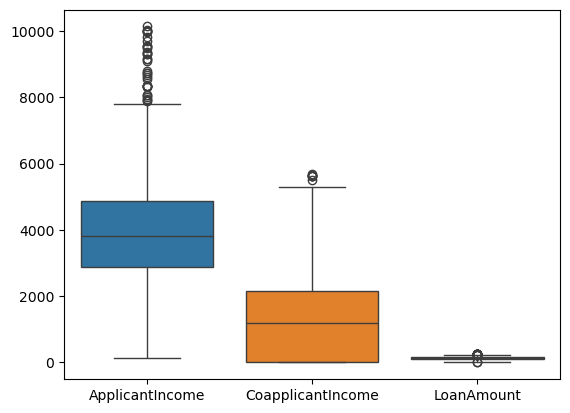

In [87]:
sns.boxplot(data=data_csv[num_columns])

In [88]:
data_csv_out = data_csv[~((data_csv[num_columns] < (Q1 - 1.5 * IQR)) | (data_csv[num_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [92]:
scaler = StandardScaler()
data_csv_out[['ApplicantIncome','CoapplicantIncome']] = scaler.fit_transform(data_csv_out[['ApplicantIncome','CoapplicantIncome']])

In [96]:
x = data_csv_out.drop('Loan_Status',axis=1)
y = data_csv_out['Loan_Status']

In [97]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
print(
    f'Train dataset \
    \nX_train: {x_train.shape[0]/len(x)*100:.0f}% \ny_train: {y_train.shape[0]/len(x)*100:.0f}% \
    \n\nValidation dataset \
    \nX_val: {x_test.shape[0]/len(x)*100:.0f}% \ny_val: {y_test.shape[0]/len(x)*100:.0f}%'
)

Train dataset     
X_train: 80% 
y_train: 80%     

Validation dataset     
X_val: 20% 
y_val: 20%


In [ ]:
data_csv_out.to_csv('cleaned_data.csv', index=False)